In [36]:
import pandas as pd
import pickle
import datetime
import numpy as np
from collections import Counter
from itertools import chain 
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",5000)

In [37]:
def get_data_range(date_range=31):
    df = []
    for day in range(3, date_range+1):
        try:
            data = pd.read_parquet(f"../data_rr/vod_ldd_ecpm_daily_details_rr/year=2023/month=1/day={day}")
            df.append(data)
        except:
            print('path not exists',f"../data_rr/vod_ldd_ecpm_daily_details_rr/year=2023/month=1/day={day}")
    df = pd.concat(df)
    return df

In [38]:
df1 = get_data_range()
media = pd.read_parquet("../data_rr/ldd_media/child_tags_20220215.parquet")
df2 = df1.merge(media[['cid', 'ip']], on='cid', how='left', suffixes=('', '_of_cid'))
df2.head()

,dnum,cid,columnsName,algo_type,baseCid,baseName,cidName,position,dateTime,pay_amt,producettype,frompagelevel1,vod_clk_cnt,sd_cpm,sd_income,col_algo_eps_pv,launcher_clk_cnt,income_filter,col_algo_cpm_filter,timestamp,ip
0,547123399,LdmarQxVeh1642668150559,【下滑更多↓】猜你喜欢：一次看过瘾,replace,TjFdOvcZFC1670400470834,汽车世界之工程车好伙伴 第八季,汽车世界之工程车好伙伴 第五季,"{0,0}",2023-01-03 12:43:11,19.00,套餐,1.0,1,30.7443,19.0000,1043515,0,19.0,0.631999,2023-01-03 04:49:26,NaN
1,512533498,dJtprTbOtC1614159028243,【下滑更多↓】猜你喜欢：一次看过瘾,replace,ANEqaPBcyO1604037148198,汽车世界之玩具车总动员,汽车世界之玩具车总动员第三季,"{0,0}",2023-01-03 20:06:38,19.00,套餐,1.0,2,148.4375,19.0000,1043515,0,19.0,0.631999,2023-01-03 12:13:07,汽车世界
2,609366049,TjFdOvcZFC1670400470834,【下滑更多↓】猜你喜欢：一次看过瘾,replace,OZGFxJdCEA1604037148197,汽车世界之工程车好伙伴,汽车世界之工程车好伙伴 第八季,"{0,2}",2023-01-03 18:42:15,9.90,套餐,0.0,1,27.5000,9.9000,1043515,0,9.9,0.631999,2023-01-03 10:46:46,NaN
3,594676459,sTuXtscHGg1660283881528,【下滑更多↓】猜你喜欢：一次看过瘾,replace,dcFXccjtWN1670988679451,宝贝赳赳 第五季,宝贝赳赳 第四季,"{0,1}",2023-01-03 07:34:59,19.00,套餐,1.0,1,7.7997,19.0000,1043515,0,19.0,0.631999,2023-01-02 23:43:00,NaN
4,594778498,CCTCLxMrbY1612921864880,【下滑更多↓】猜你喜欢：一次看过瘾,replace,nmyUqVpBlr1614164299502,汪汪队立大功全集,汪汪队立大功 第2季,"{0,2}",2023-01-03 15:48:38,19.00,套餐,1.0,1,24.2656,19.0000,1043515,0,19.0,0.631999,2023-01-03 12:08:54,汪汪队


In [39]:
df = df2.merge(media[['cid', 'ip']], left_on='baseCid', right_on='cid', how='left', suffixes=('', '_of_baseCid'))
df.head(5)

,dnum,cid,columnsName,algo_type,baseCid,baseName,cidName,position,dateTime,pay_amt,producettype,frompagelevel1,vod_clk_cnt,sd_cpm,sd_income,col_algo_eps_pv,launcher_clk_cnt,income_filter,col_algo_cpm_filter,timestamp,ip,cid_of_baseCid,ip_of_baseCid
0,547123399,LdmarQxVeh1642668150559,【下滑更多↓】猜你喜欢：一次看过瘾,replace,TjFdOvcZFC1670400470834,汽车世界之工程车好伙伴 第八季,汽车世界之工程车好伙伴 第五季,"{0,0}",2023-01-03 12:43:11,19.00,套餐,1.0,1,30.7443,19.0000,1043515,0,19.0,0.631999,2023-01-03 04:49:26,NaN,NaN,NaN
1,512533498,dJtprTbOtC1614159028243,【下滑更多↓】猜你喜欢：一次看过瘾,replace,ANEqaPBcyO1604037148198,汽车世界之玩具车总动员,汽车世界之玩具车总动员第三季,"{0,0}",2023-01-03 20:06:38,19.00,套餐,1.0,2,148.4375,19.0000,1043515,0,19.0,0.631999,2023-01-03 12:13:07,汽车世界,ANEqaPBcyO1604037148198,汽车世界
2,609366049,TjFdOvcZFC1670400470834,【下滑更多↓】猜你喜欢：一次看过瘾,replace,OZGFxJdCEA1604037148197,汽车世界之工程车好伙伴,汽车世界之工程车好伙伴 第八季,"{0,2}",2023-01-03 18:42:15,9.90,套餐,0.0,1,27.5000,9.9000,1043515,0,9.9,0.631999,2023-01-03 10:46:46,NaN,OZGFxJdCEA1604037148197,汽车世界
3,594676459,sTuXtscHGg1660283881528,【下滑更多↓】猜你喜欢：一次看过瘾,replace,dcFXccjtWN1670988679451,宝贝赳赳 第五季,宝贝赳赳 第四季,"{0,1}",2023-01-03 07:34:59,19.00,套餐,1.0,1,7.7997,19.0000,1043515,0,19.0,0.631999,2023-01-02 23:43:00,NaN,NaN,NaN
4,594778498,CCTCLxMrbY1612921864880,【下滑更多↓】猜你喜欢：一次看过瘾,replace,nmyUqVpBlr1614164299502,汪汪队立大功全集,汪汪队立大功 第2季,"{0,2}",2023-01-03 15:48:38,19.00,套餐,1.0,1,24.2656,19.0000,1043515,0,19.0,0.631999,2023-01-03 12:08:54,汪汪队,nmyUqVpBlr1614164299502,汪汪队


In [40]:
df_trex = df[(df.algo_type=='trex')]
df_replace =df[(df.algo_type=='replace')]

In [41]:
# Distribution of 'ip_of_baseCid' and 'ip'
ip_baseCid_distribution = df['ip_of_baseCid'].value_counts(dropna=False)
ip_distribution = df['ip'].value_counts(dropna=False)
ip_baseCid_distribution, ip_distribution

(NaN         3907
 汪汪队          889
 小猪佩奇         700
 超级宝贝JoJo     474
 奥特曼          295
             ... 
 蜡笔小新           1
 僵小鱼            1
 小伴龙            1
 猪小屁            1
 汽车小镇           1
 Name: ip_of_baseCid, Length: 131, dtype: int64,
 NaN           4220
 汪汪队            936
 小猪佩奇           665
 超级宝贝JoJo       615
 奶龙、飞狗moco等     264
               ... 
 大头儿子和小头爸爸        1
 大鼻孔              1
 咱们裸熊             1
 哪吒               1
 灰姑娘              1
 Name: ip, Length: 111, dtype: int64)

In [42]:
# Check for missing values in the columns of interest
missing_values = df[['ip_of_baseCid', 'ip', 'pay_amt']].isnull().sum()
filtered_data = df.dropna(subset=['ip_of_baseCid', 'ip'])
missing_values

ip_of_baseCid    3907
ip               4220
pay_amt             1
dtype: int64

### 下面是对于baseCid一定时，对应不同推荐cid的pay_amt的总和：

In [43]:
# Top 5 as examples
top_5_ip_of_baseCid = filtered_data['ip_of_baseCid'].value_counts().head(5).index.tolist()
# Filter data for rows where ip_of_baseCid is in the top 5 list
top_5_data = filtered_data[filtered_data['ip_of_baseCid'].isin(top_5_ip_of_baseCid)]
# Calculate the sum of pay_amt for each ip grouped by ip_of_baseCid
pay_amt_sum_top_5 = top_5_data.groupby(['ip_of_baseCid', 'ip'])['pay_amt'].sum().reset_index()
dfs = {}
for baseCid in top_5_ip_of_baseCid:
    dfs[baseCid] = pay_amt_sum_top_5[pay_amt_sum_top_5['ip_of_baseCid'] == baseCid].sort_values(by='pay_amt', ascending=False)
dfs

{'汪汪队':    ip_of_baseCid          ip   pay_amt
 25           汪汪队         汪汪队  16092.70
 30           汪汪队    超级宝贝JoJo    971.70
 27           汪汪队         熊出没    388.90
 24           汪汪队        小猪佩奇    221.00
 19           汪汪队       倒霉蛋涂涂    154.90
 22           汪汪队  奶龙、飞狗moco等    136.90
 29           汪汪队        萌鸡小队     77.50
 21           汪汪队         奥特曼     66.00
 26           汪汪队        汽车世界     28.90
 28           汪汪队        猫和老鼠     26.60
 20           汪汪队          大卫     19.00
 23           汪汪队        宝宝巴士     19.00,
 '小猪佩奇':    ip_of_baseCid          ip  pay_amt
 12          小猪佩奇        小猪佩奇  6917.90
 18          小猪佩奇    超级宝贝JoJo   968.00
 13          小猪佩奇         汪汪队   697.00
 17          小猪佩奇        萌鸡小队   417.80
 16          小猪佩奇        猫和老鼠    95.90
 10          小猪佩奇  奶龙、飞狗moco等    80.20
 14          小猪佩奇         熊出没    41.00
 9           小猪佩奇       倒霉蛋涂涂    19.00
 11          小猪佩奇        宝宝巴士     1.00
 15          小猪佩奇         猪屁登     1.00,
 '超级宝贝JoJo':    ip_of_baseCid     

### 单项可视化分布如下（still以top5为例）

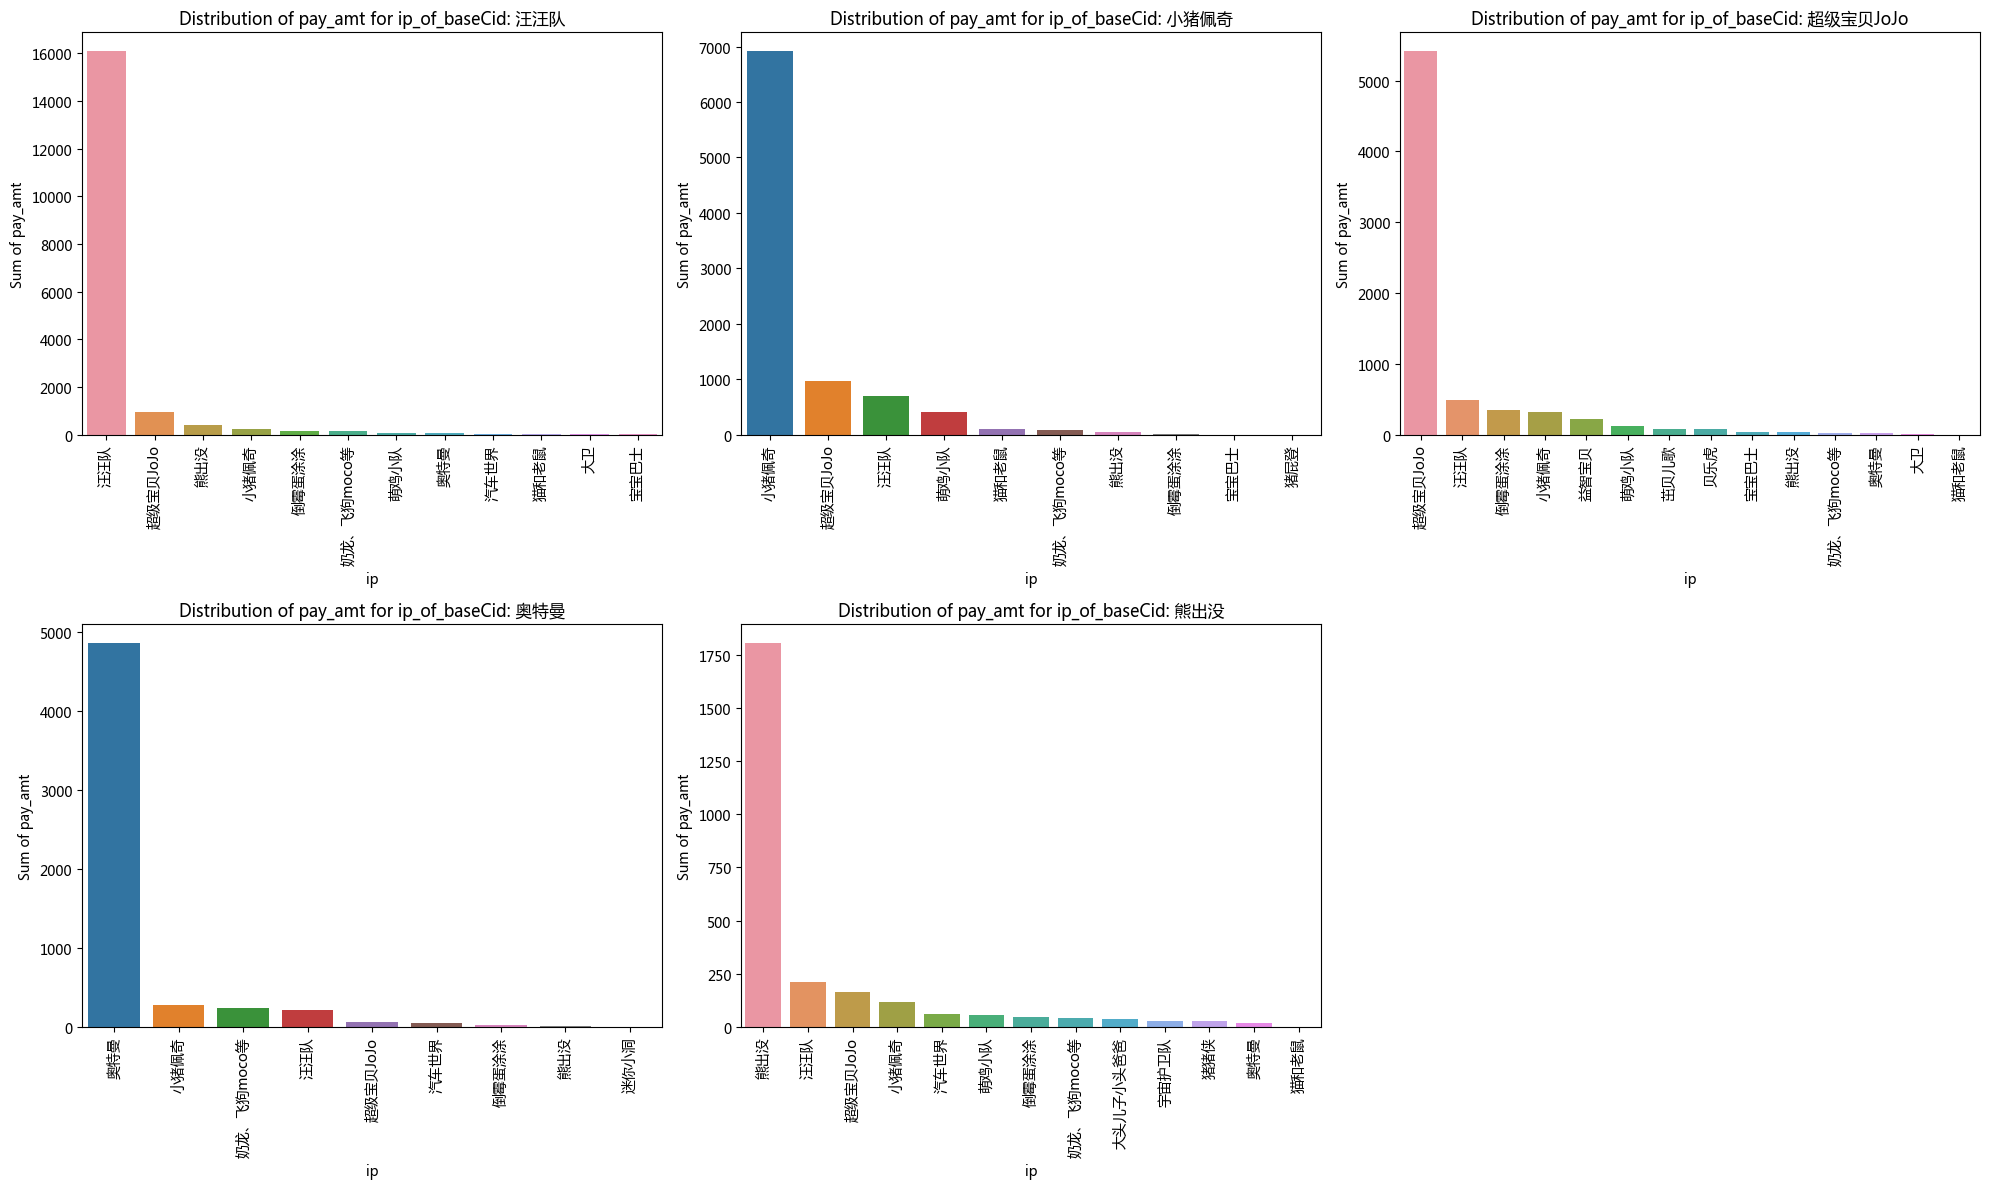

In [44]:
# 总
plt.figure(figsize=(20, 12))
for index, baseCid in enumerate(top_5_ip_of_baseCid, 1):
    plt.subplot(2, 3, index)
    sns.barplot(data=dfs[baseCid], x='ip', y='pay_amt')
    plt.title(f'Distribution of pay_amt for ip_of_baseCid: {baseCid}')
    plt.xticks(rotation=90)
    plt.ylabel('Sum of pay_amt')
plt.tight_layout()
plt.show()

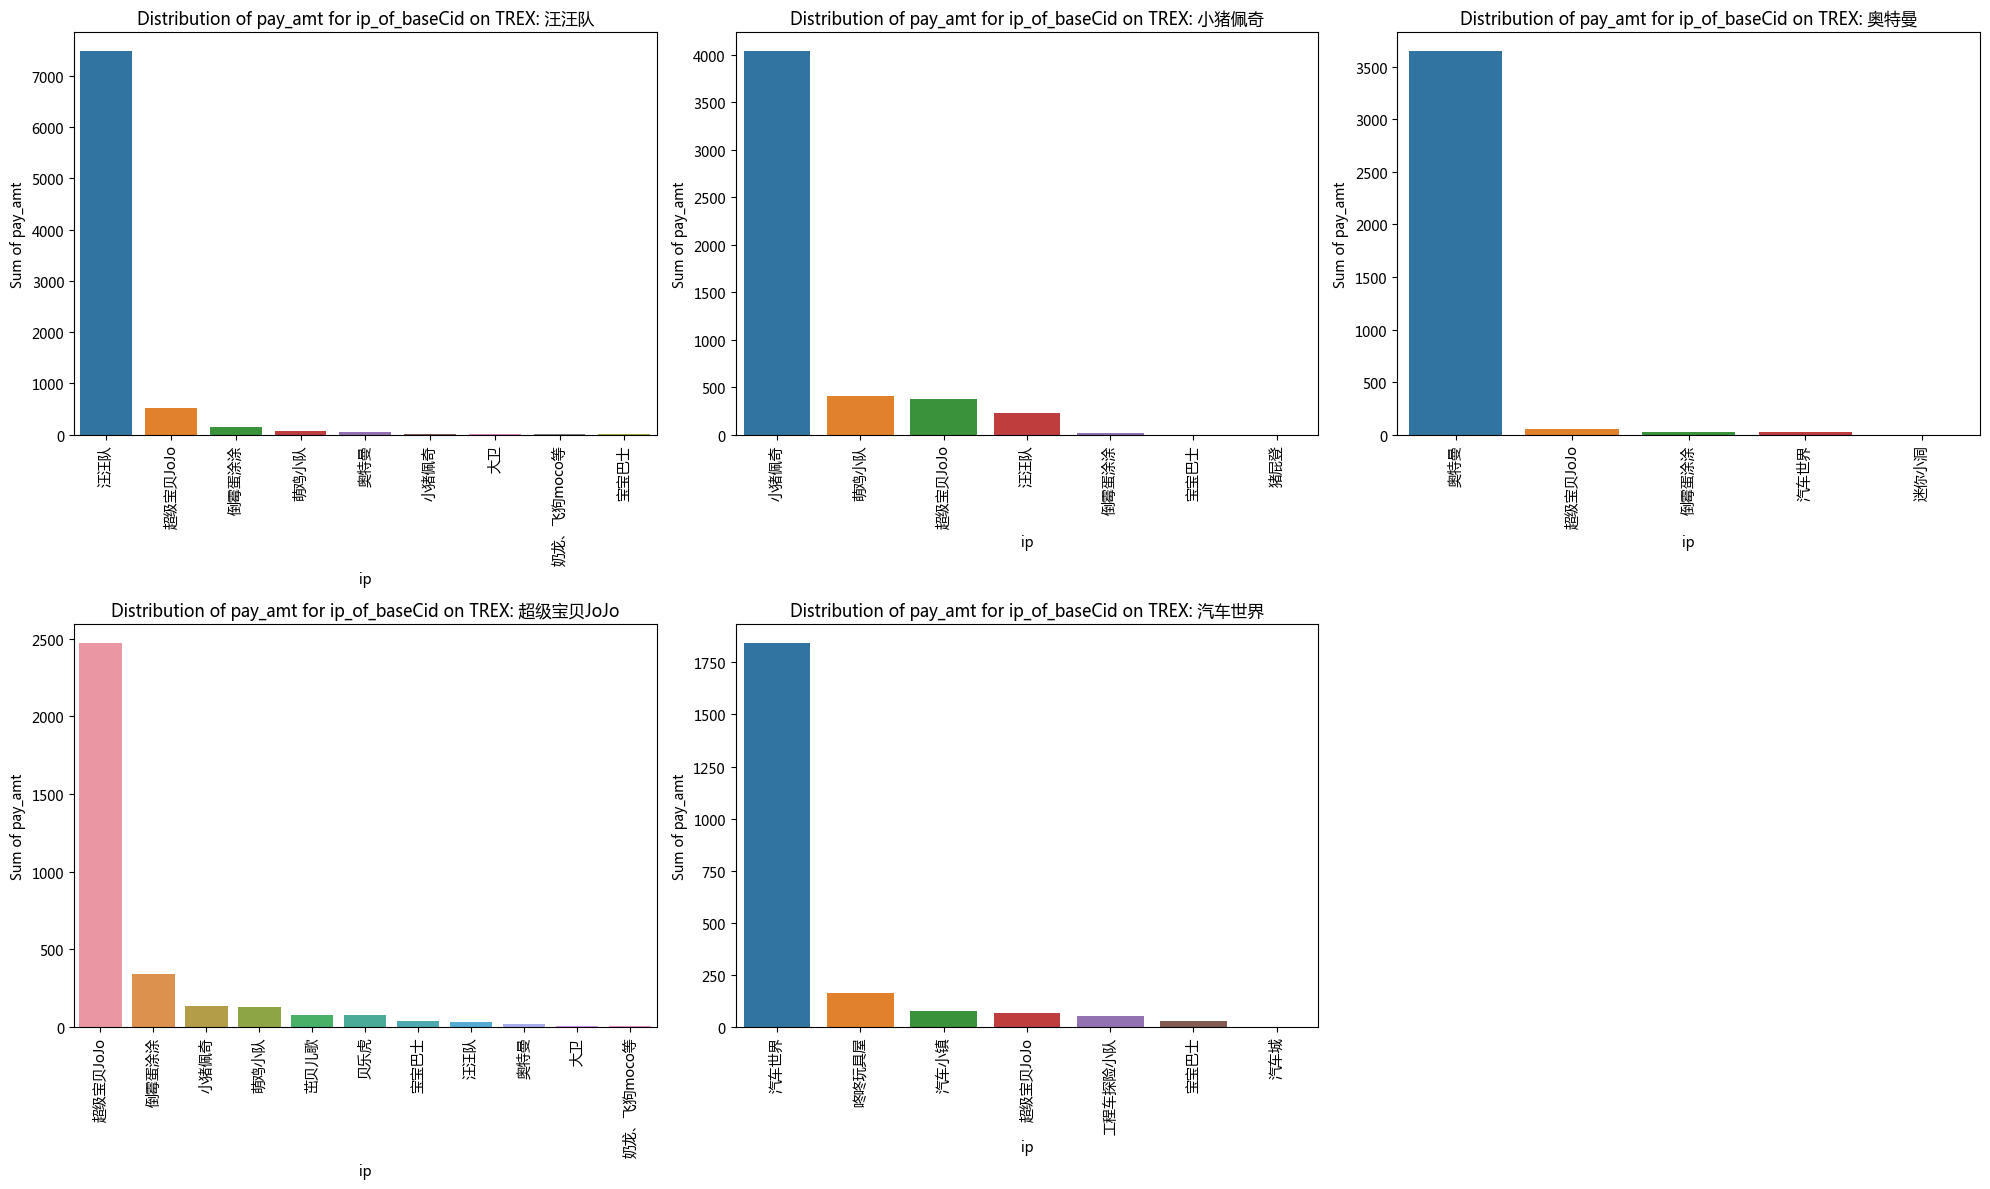

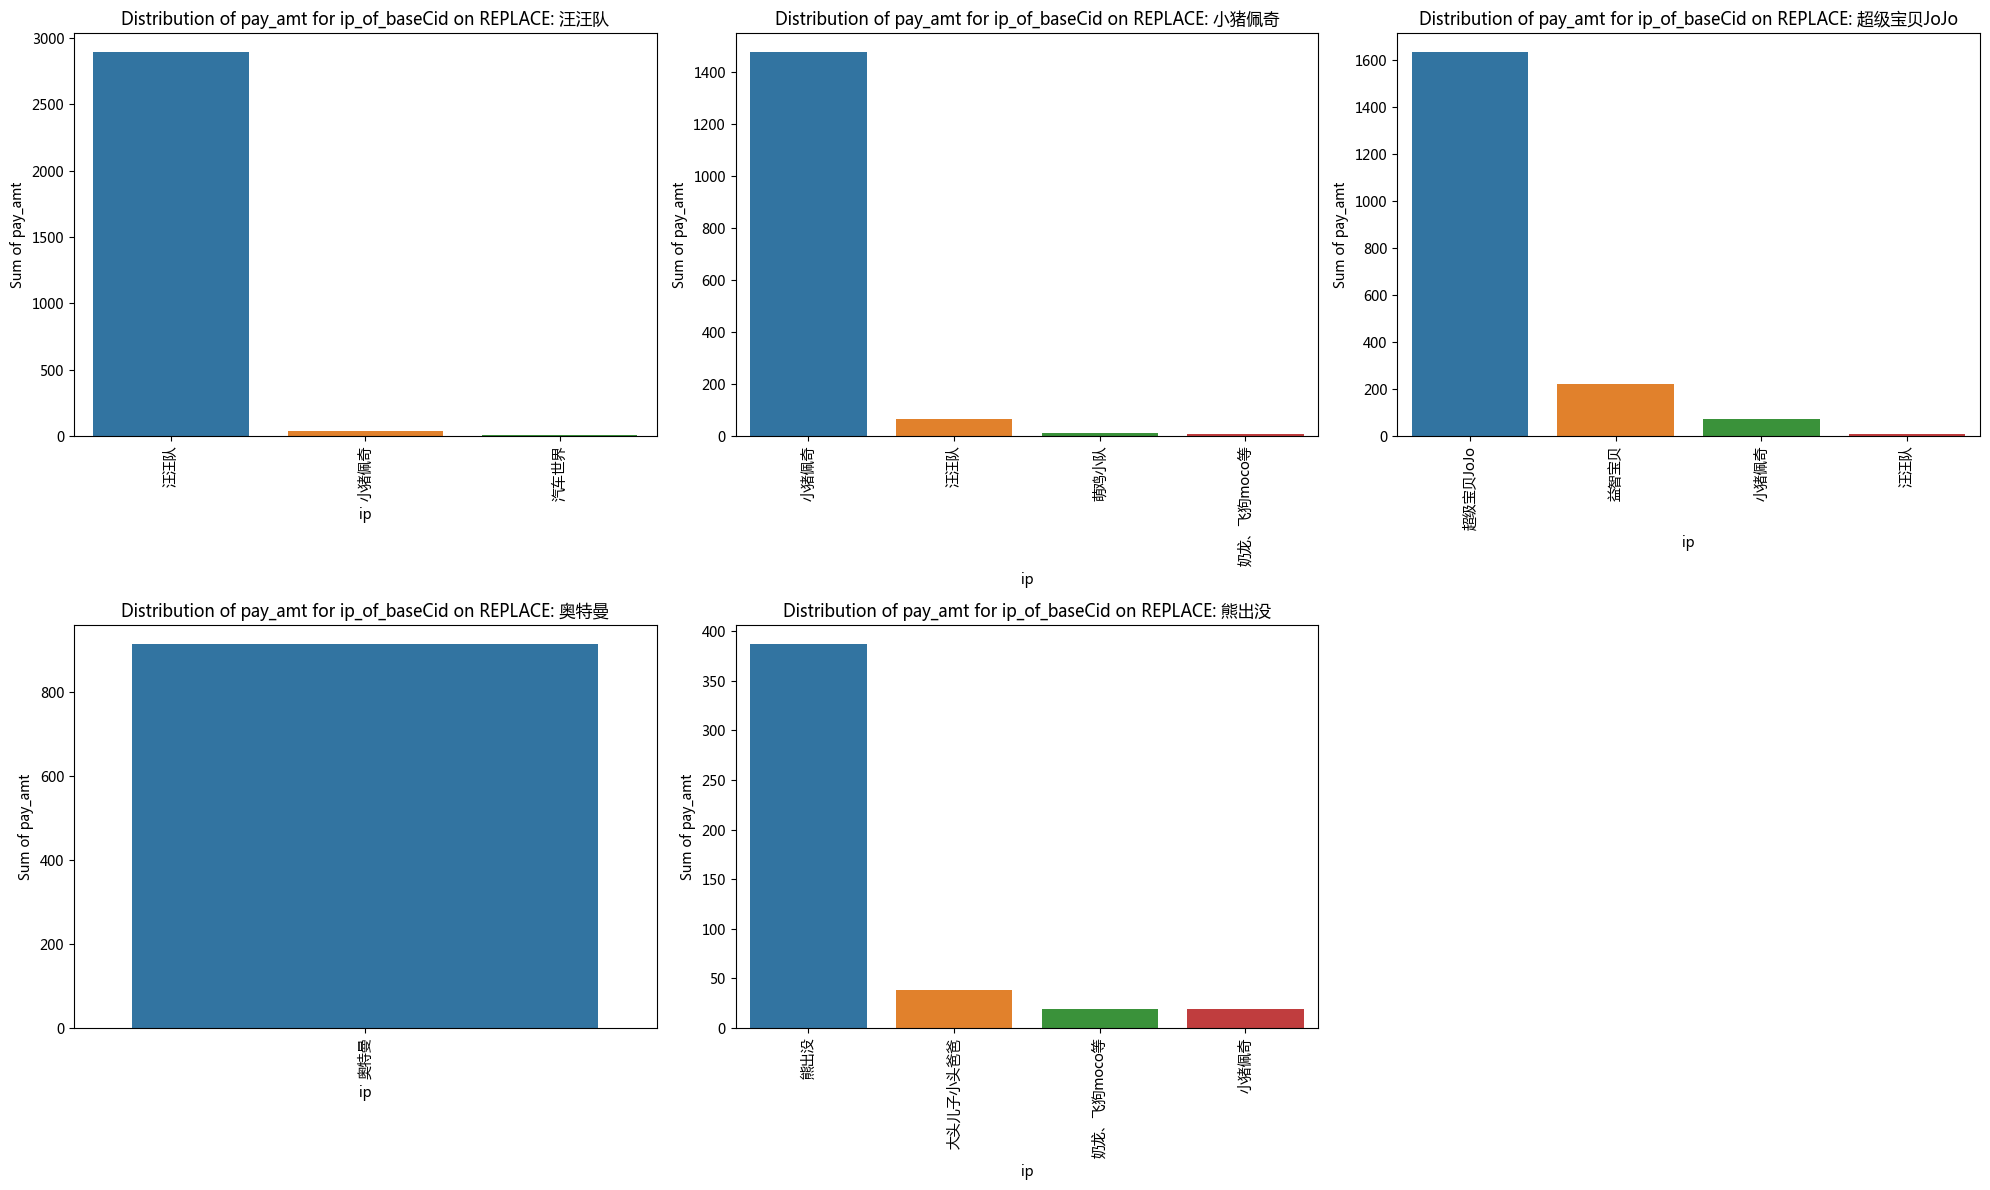

In [47]:
# 对比
# trex
filtered_data = df_trex.dropna(subset=['ip_of_baseCid', 'ip'])
top_5_ip_of_baseCid = filtered_data['ip_of_baseCid'].value_counts().head(5).index.tolist()
top_5_data = filtered_data[filtered_data['ip_of_baseCid'].isin(top_5_ip_of_baseCid)]
pay_amt_sum_top_5 = top_5_data.groupby(['ip_of_baseCid', 'ip'])['pay_amt'].sum().reset_index()
dfs = {}
for baseCid in top_5_ip_of_baseCid:
    dfs[baseCid] = pay_amt_sum_top_5[pay_amt_sum_top_5['ip_of_baseCid'] == baseCid].sort_values(by='pay_amt', ascending=False)
dfs
plt.figure(figsize=(20, 12))
for index, baseCid in enumerate(top_5_ip_of_baseCid, 1):
    plt.subplot(2, 3, index)
    sns.barplot(data=dfs[baseCid], x='ip', y='pay_amt')
    plt.title(f'Distribution of pay_amt for ip_of_baseCid on TREX: {baseCid}')
    plt.xticks(rotation=90)
    plt.ylabel('Sum of pay_amt')
plt.tight_layout()
plt.show()

# replace
filtered_data = df_replace.dropna(subset=['ip_of_baseCid', 'ip'])
top_5_ip_of_baseCid = filtered_data['ip_of_baseCid'].value_counts().head(5).index.tolist()
top_5_data = filtered_data[filtered_data['ip_of_baseCid'].isin(top_5_ip_of_baseCid)]
pay_amt_sum_top_5 = top_5_data.groupby(['ip_of_baseCid', 'ip'])['pay_amt'].sum().reset_index()
dfs = {}
for baseCid in top_5_ip_of_baseCid:
    dfs[baseCid] = pay_amt_sum_top_5[pay_amt_sum_top_5['ip_of_baseCid'] == baseCid].sort_values(by='pay_amt', ascending=False)
dfs
plt.figure(figsize=(20, 12))
for index, baseCid in enumerate(top_5_ip_of_baseCid, 1):
    plt.subplot(2, 3, index)
    sns.barplot(data=dfs[baseCid], x='ip', y='pay_amt')
    plt.title(f'Distribution of pay_amt for ip_of_baseCid on REPLACE: {baseCid}')
    plt.xticks(rotation=90)
    plt.ylabel('Sum of pay_amt')
plt.tight_layout()
plt.show()

### 对于所有分布可得到结果如下

/data/dev/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


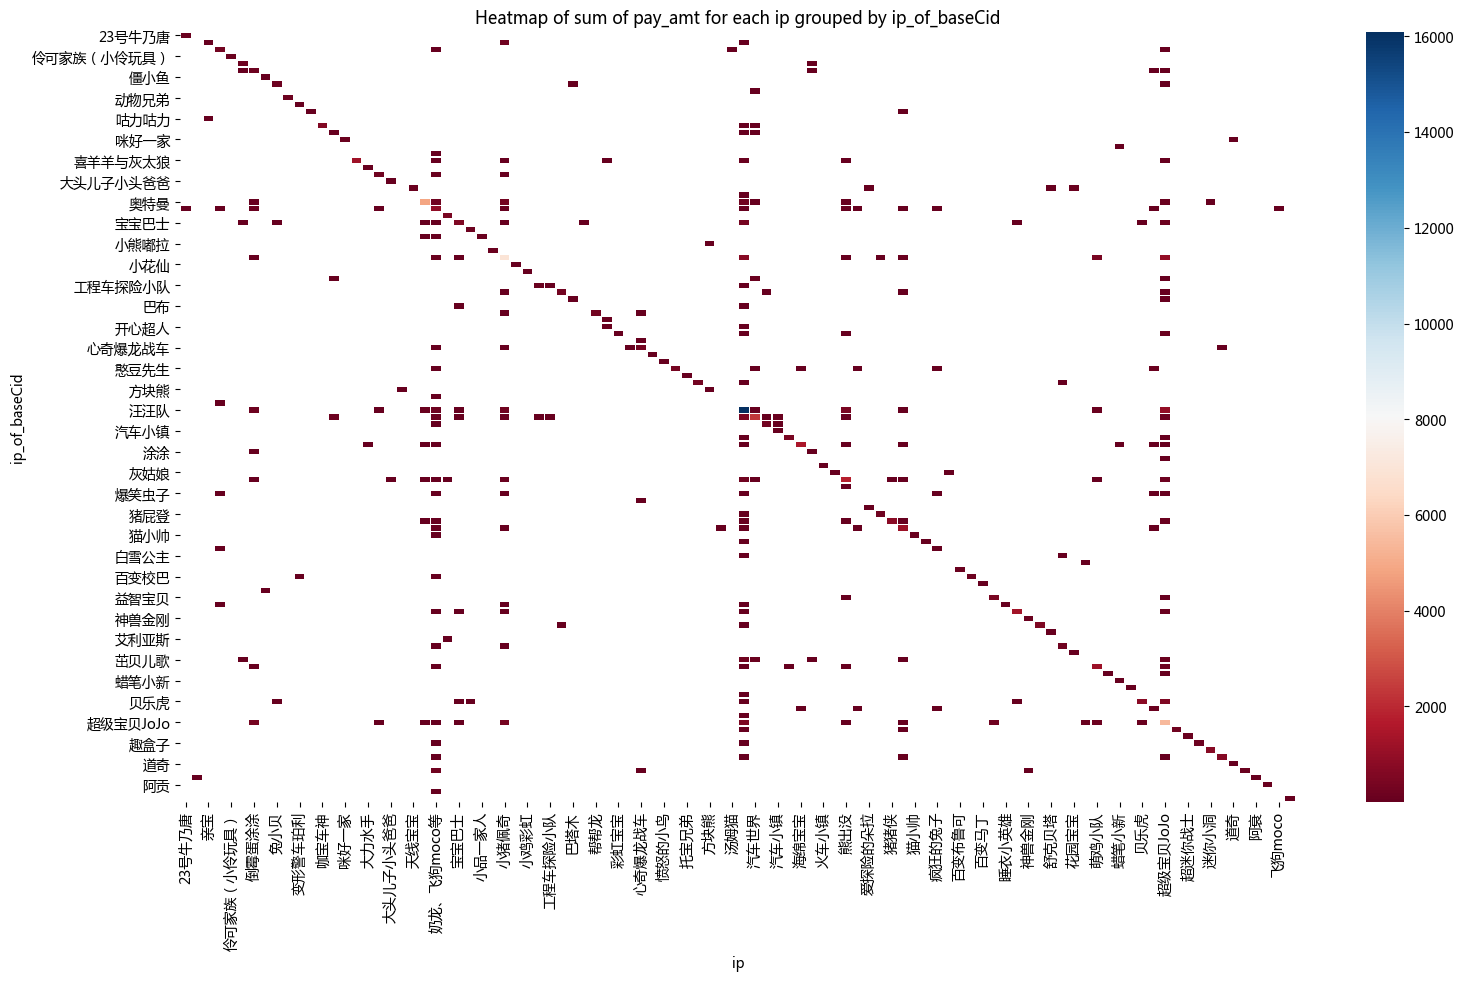

In [33]:
# 总
filtered_data['pay_amt'] = filtered_data['pay_amt'].astype(float)
pay_amt_sum_all = filtered_data.groupby(['ip_of_baseCid', 'ip'])['pay_amt'].sum().unstack()
plt.figure(figsize=(18, 10))
sns.heatmap(pay_amt_sum_all, cmap="RdBu", linewidths=.5)
plt.title('Heatmap of sum of pay_amt for each ip grouped by ip_of_baseCid')
plt.show()

/data/dev/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


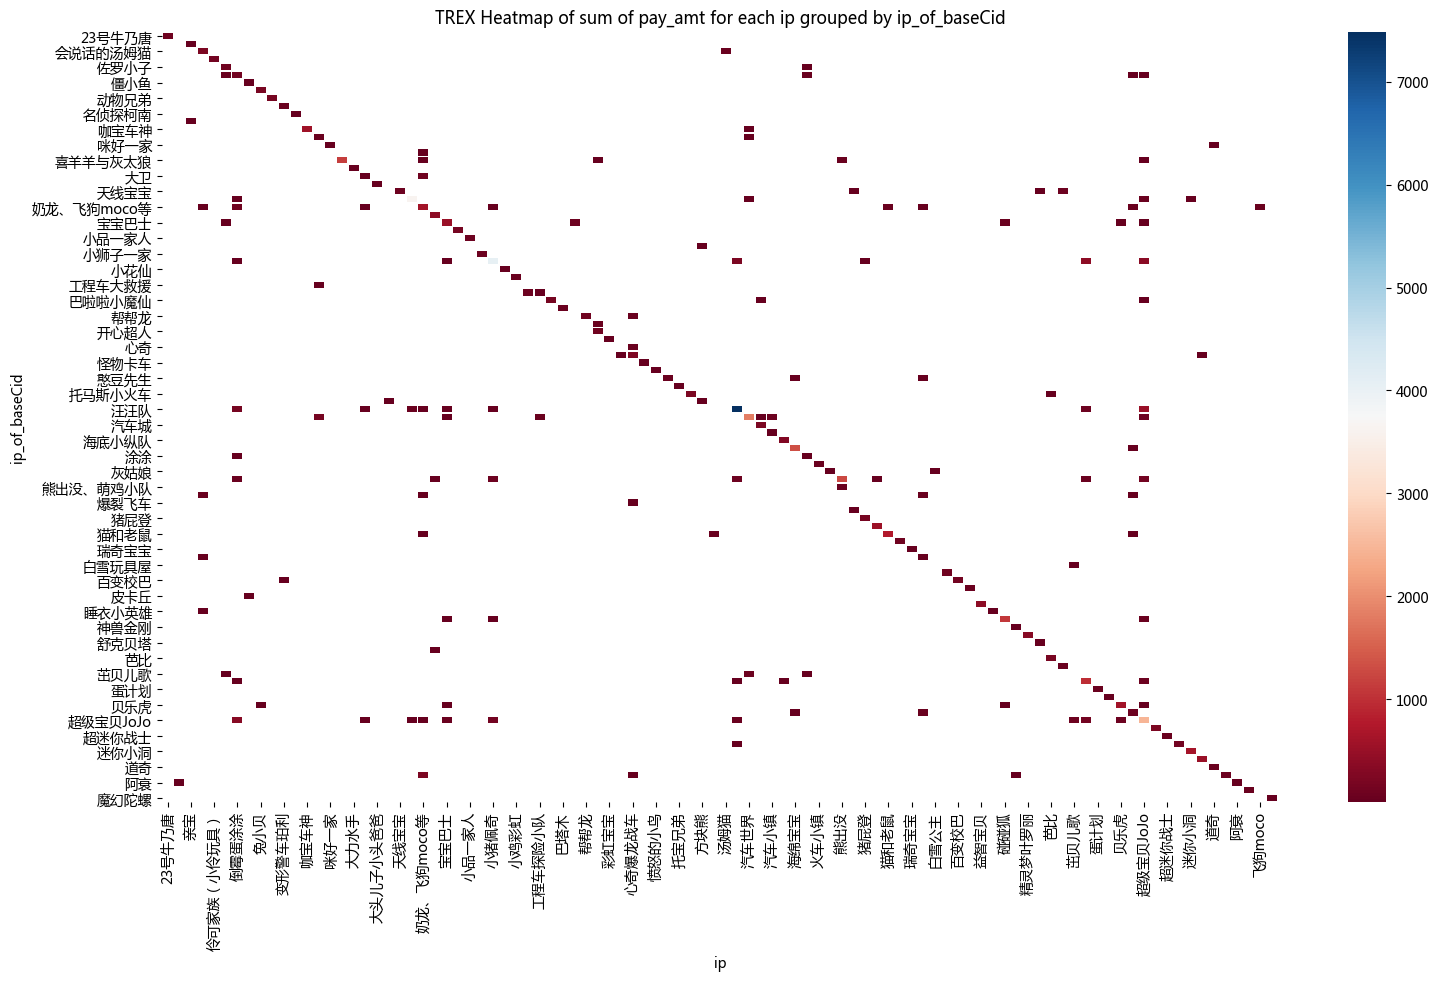

In [49]:
# trex
filtered_data = df_trex.dropna(subset=['ip_of_baseCid', 'ip'])
filtered_data['pay_amt'] = filtered_data['pay_amt'].astype(float)
pay_amt_sum_all = filtered_data.groupby(['ip_of_baseCid', 'ip'])['pay_amt'].sum().unstack()
plt.figure(figsize=(18, 10))
sns.heatmap(pay_amt_sum_all, cmap="RdBu", linewidths=.5)
plt.title('TREX Heatmap of sum of pay_amt for each ip grouped by ip_of_baseCid')
plt.show()

/data/dev/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


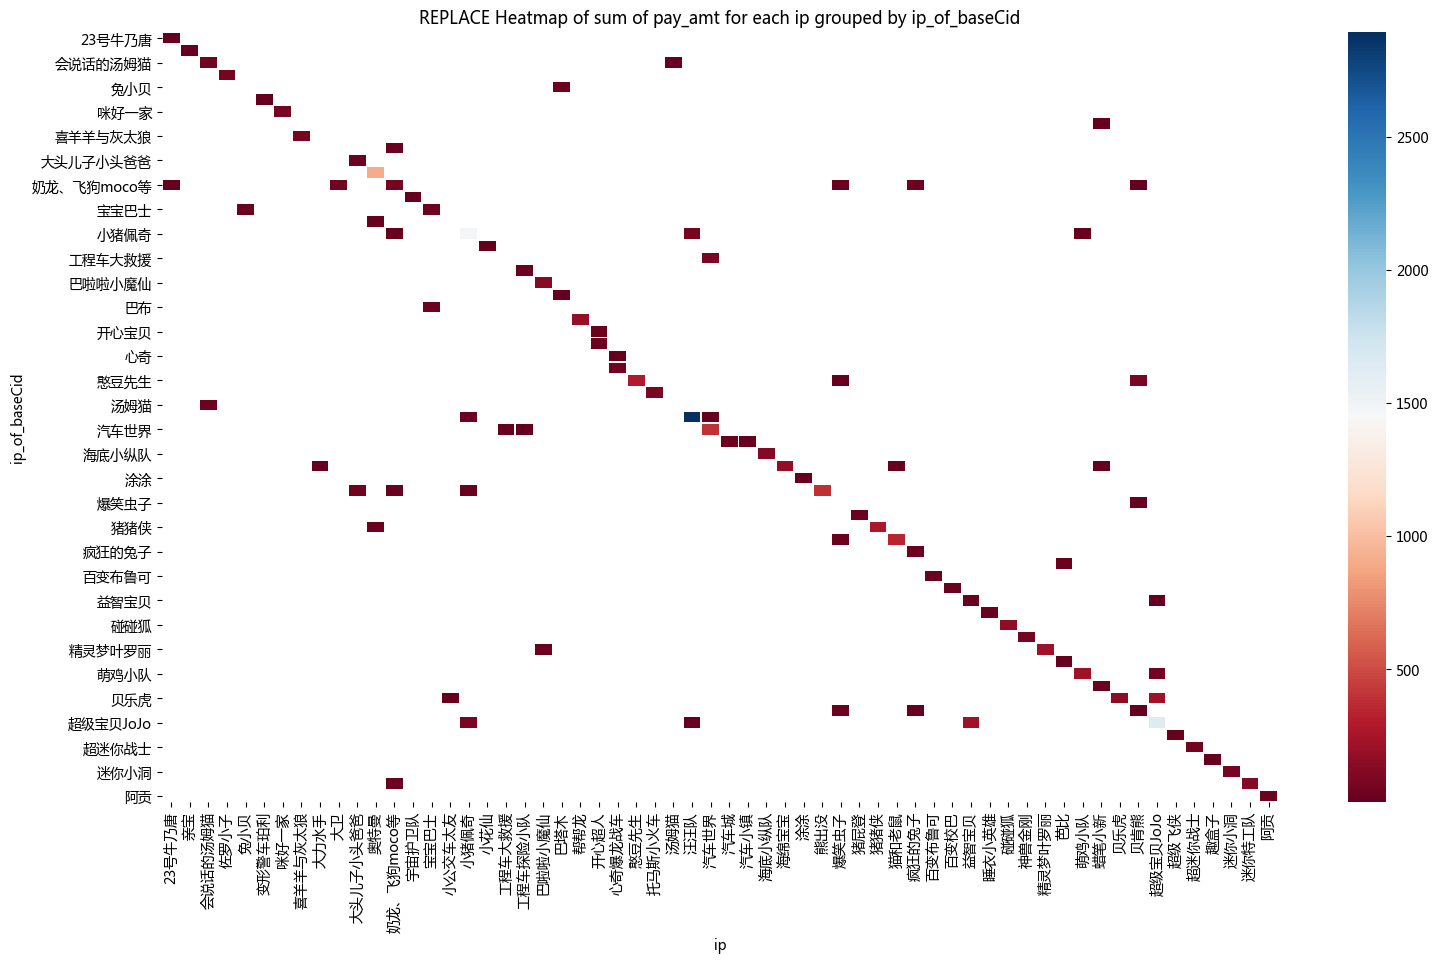

In [50]:
# replace
filtered_data = df_replace.dropna(subset=['ip_of_baseCid', 'ip'])
filtered_data['pay_amt'] = filtered_data['pay_amt'].astype(float)
pay_amt_sum_all = filtered_data.groupby(['ip_of_baseCid', 'ip'])['pay_amt'].sum().unstack()
plt.figure(figsize=(18, 10))
sns.heatmap(pay_amt_sum_all, cmap="RdBu", linewidths=.5)
plt.title('REPLACE Heatmap of sum of pay_amt for each ip grouped by ip_of_baseCid')
plt.show()